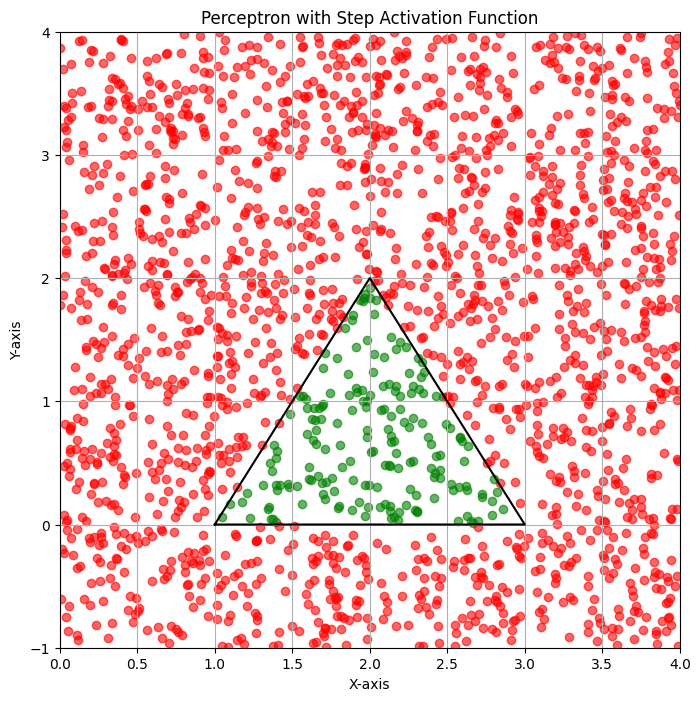

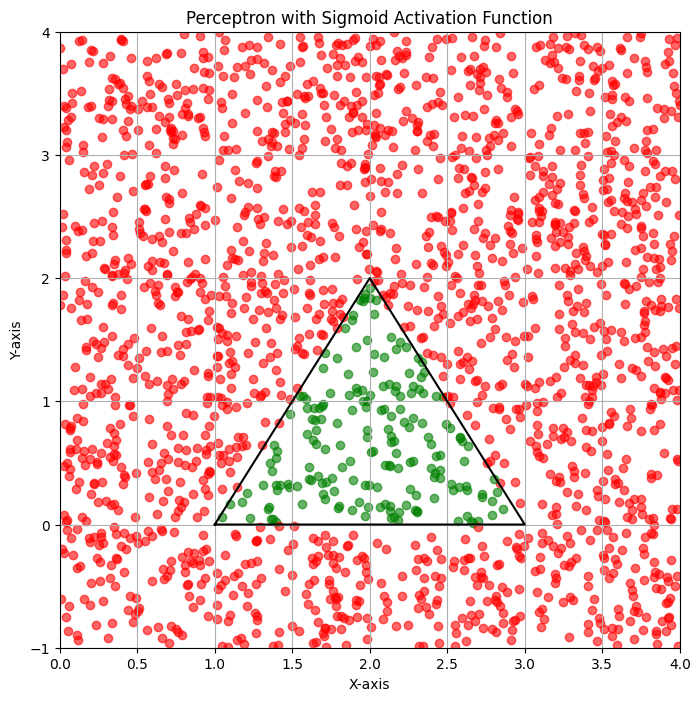

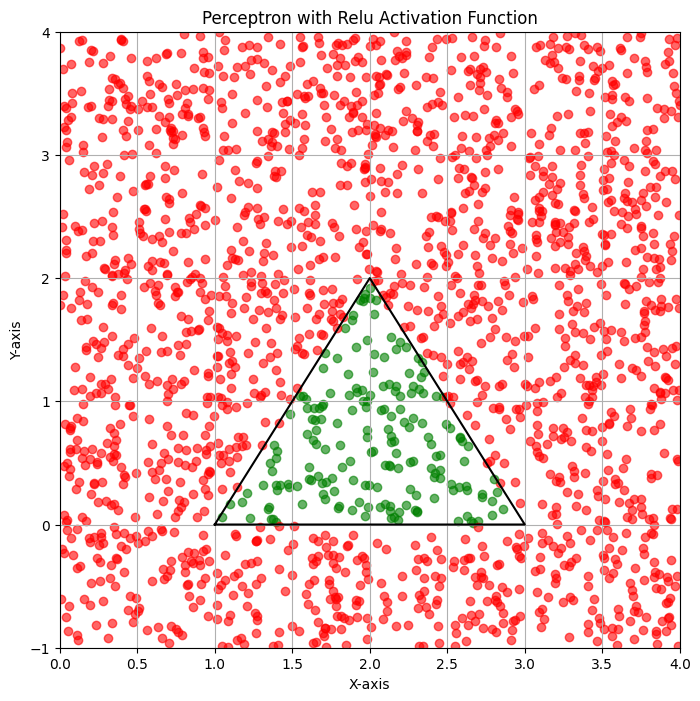

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Perceptron class with multiple activation functions
class Perceptron:
    def __init__(self, input_size, activation=None):
        self.weights = np.random.rand(input_size + 1)  # +1 for bias
        self.activation = activation

    def activation_function(self, x):
        if self.activation == "step":
            return 1 if x >= 0 else 0
        elif self.activation == "sigmoid":
            return 1 / (1 + np.exp(-x))
        elif self.activation == "relu":
            return max(0, x)
        else:
            raise ValueError("I have set 3 types of activation functions, but you still want something different. Are you trying to annoy me?")

    def predict(self, inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]  # w.x + b
        return self.activation_function(summation)




# Example usage
np.random.seed(73)

# Triangle vertices
triangle_vertices = np.array([[1, 0], [2, 2], [3, 0], [1, 0]])

# Generate 200 random points and labels
points = np.random.uniform(low=[0, -1], high=[4, 4], size=(2000, 2))


def is_inside_triangle(x, y):
    p1, p2, p3 = np.array([1, 0]), np.array([2, 2]), np.array([3, 0])
    def triangle_area(a, b, c):
        return 0.5 * abs(a[0] * (b[1] - c[1]) + b[0] * (c[1] - a[1]) + c[0] * (a[1] - b[1]))
    A = triangle_area(p1, p2, p3)
    A1 = triangle_area(np.array([x, y]), p2, p3)
    A2 = triangle_area(p1, np.array([x, y]), p3)
    A3 = triangle_area(p1, p2, np.array([x, y]))
    return 1 if np.isclose(A, A1 + A2 + A3) else 0


labels = np.array([is_inside_triangle(x, y) for x, y in points])

# Train Perceptron with different activation functions and visualize results
for activation in ["step", "sigmoid", "relu"]:
    perceptron = Perceptron(input_size=2, activation=activation)
    # Plot the results
    plt.figure(figsize=(8, 8))
    for point, label in zip(points, labels):
        color = 'green' if label == 1 else 'red'
        plt.scatter(point[0], point[1], color=color, alpha=0.6)
    plt.plot(triangle_vertices[:, 0], triangle_vertices[:, 1], color='black', linestyle='-', linewidth=1.5)
    plt.xlim(0, 4)
    plt.ylim(-1, 4)
    plt.title(f"Perceptron with {activation.capitalize()} Activation Function")
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.grid(True)
    plt.show()
